In [1]:
%matplotlib inline

import os
import time
import datetime
import glob
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import graphtools as gt
import phate
import magic

from scipy import sparse
from scipy.stats import zscore 

import sys
sys.path.append('/home/ngr4/project/scripts/')
import utils

plt.rc('font', size = 8)
plt.rc('font', family='sans serif')
plt.rcParams['pdf.fonttype']=42
plt.rcParams['ps.fonttype']=42
plt.rcParams['legend.frameon']=False
sns.set_style("ticks")

In [2]:
# CTRL- 15162, 4092
# SCA1- 122, 132
# SCA3- 32, 33, 34, 35

pdfp = '/home/ngr4/project/scnd/data/processed/'
pfp = '/home/ngr4/project/scnd/results'
sc.settings.figdir = pfp

if True:
    adata = utils.load_adata(os.path.join(pdfp, 'hum_wsca3.h5ad'))

loaded @201022.09:46:29
took 7.48-s to load data


/gpfs/ycga/project/dijk/ngr4/conda_envs/py385dev/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/gpfs/ycga/project/dijk/ngr4/conda_envs/py385dev/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
Trying to set attribute `.uns` of view, copying.


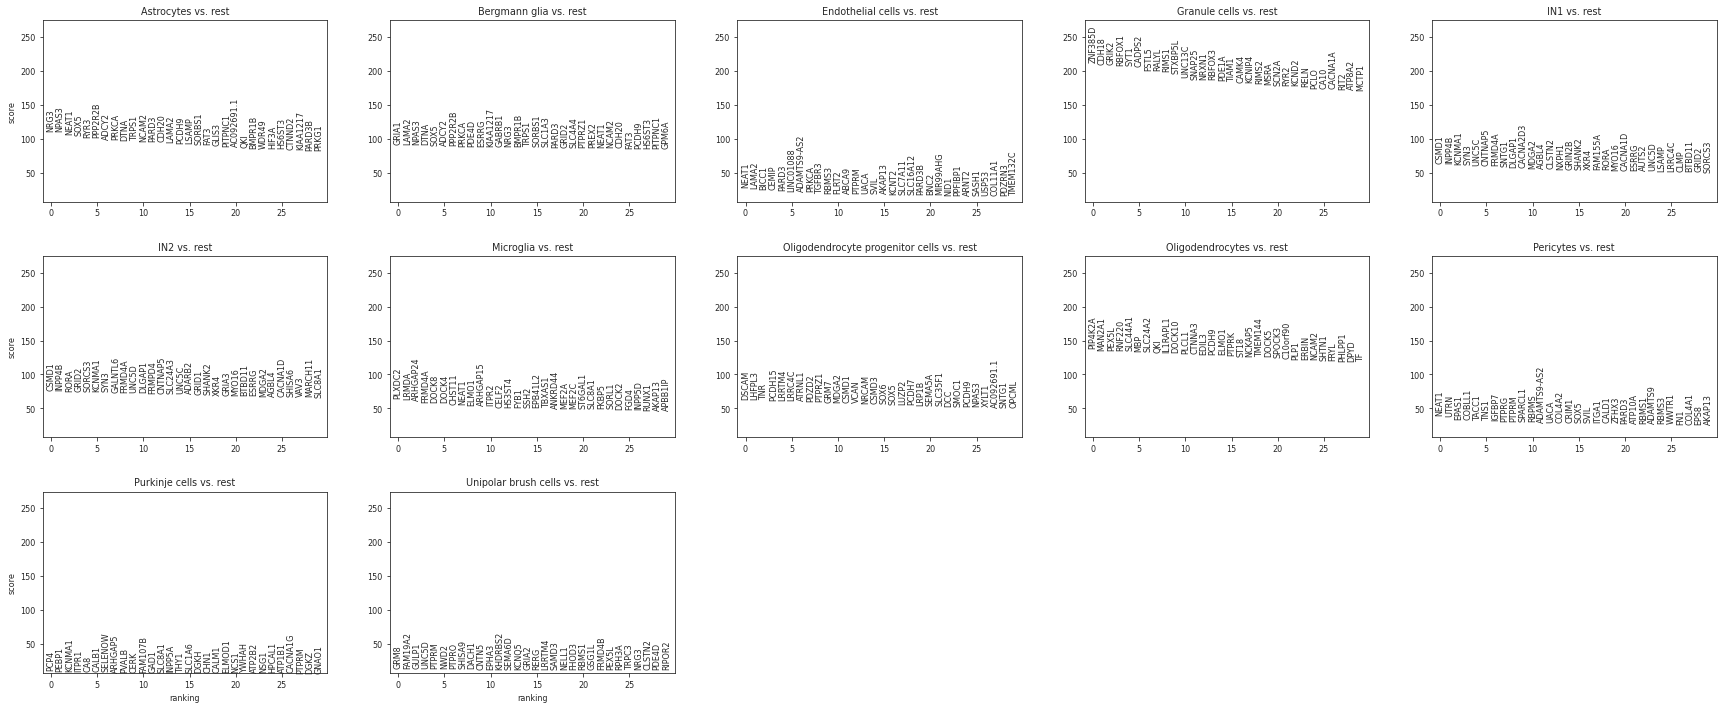

In [7]:
if False:
    adata = adata[:, [True if not i.startswith('MT-') else False for i in adata.var_names]]
    sc.tl.rank_genes_groups(adata, 'ctype', use_raw=False, groups='all', reference='rest', n_genes=100, rankby_abs=False, pts=False, key_added=None, copy=False, method='wilcoxon', corr_method='benjamini-hochberg', tie_correct=False, layer=None)
    sc.pl.rank_genes_groups(adata, groups=None, n_genes=30, gene_symbols=None, key='rank_genes_groups', fontsize=8, ncols=5, sharey=True, show=None, save='_ctype_dge_v2.pdf', ax=None)

In [13]:
if False:
    # already done if False
    adata.obs['Sample'] = adata.obs.batch.astype(str)
    adata.obs['Sample'][adata.obs.batch=='1-Jan']='SCA1-1'
    adata.obs['Sample'][adata.obs.batch=='14']='CTRL-1'
    adata.obs['Sample'][adata.obs.batch=='1516']='CTRL-3'
    adata.obs['Sample'][adata.obs.batch=='2-Jan']='SCA1-2'
    adata.obs['Sample'][adata.obs.batch=='3-Jan']='SCA1-3'
    adata.obs['Sample'][adata.obs.batch=='409']='CTRL-2'
    adata.obs.loc[adata.obs.batch=='32', 'Sample'] = 'SCA3-1'
    adata.obs.loc[adata.obs.batch=='33', 'Sample'] = 'SCA3-2'
    adata.obs.loc[adata.obs.batch=='34', 'Sample'] = 'SCA3-3'
    adata.obs.loc[adata.obs.batch=='35', 'Sample'] = 'SCA3-4'
    adata.obs.loc[adata.obs.batch=='122', 'Sample'] = 'SCA1-4'
    adata.obs.loc[adata.obs.batch=='132', 'Sample'] = 'SCA1-5'
    adata.obs.loc[adata.obs.batch=='15162', 'Sample'] = 'CTRL-4'
    adata.obs.loc[adata.obs.batch=='4092', 'Sample'] = 'CTRL-5'

    # add genotype
    adata.obs['Condition'] = [i.split('-')[0] for i in adata.obs['Sample']]

<ipython-input-13-487eb0a634be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs['Sample'][adata.obs.batch=='1-Jan']='SCA1-1'
<ipython-input-13-487eb0a634be>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs['Sample'][adata.obs.batch=='14']='CTRL-1'
<ipython-input-13-487eb0a634be>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs['Sample'][adata.obs.batch=='1516']='CTRL-3'
<ipython-input-13-487eb0a634be>:5: 

In [14]:
adata.obs.head()

,batch,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,pmito,n_genes,leiden,ctype,subclusters,IN_subcluster,Sample,Condition
AAACCCAAGGCCTAAG-1-2-Jan,2-Jan,1368,7.221836,2593.0,7.860956,24.681836,33.166217,45.622831,66.525260,0.008484,1368,10,Granule cells,None,None,SCA1-2,SCA1
AAACCCATCAATGTCG-1-2-Jan,2-Jan,2625,7.873217,6283.0,8.745762,22.170937,29.985676,39.423842,56.660831,0.037084,2625,21,Granule cells,None,None,SCA1-2,SCA1
AAACGAAAGCGAGTCA-1-2-Jan,2-Jan,1198,7.089243,1864.0,7.531016,24.034335,32.618026,43.562232,62.553648,0.046674,1198,23,Granule cells,None,None,SCA1-2,SCA1
AAACGAAAGTTCCATG-1-2-Jan,2-Jan,2802,7.938446,6238.0,8.738575,20.102597,26.739340,35.572299,52.116063,0.010099,2802,2,Granule cells,None,None,SCA1-2,SCA1
AAACGAACAAATCAGA-1-2-Jan,2-Jan,409,6.016157,501.0,6.218600,28.343313,38.323353,58.283433,100.000000,0.087824,409,0,Granule cells,None,None,SCA1-2,SCA1


In [4]:
markers = {
    'Granule cell':['GABRA6','SLC17A7'],
    'Unipolar brush cell':['SLC17A6','EOMES'],
    'Purkinje cell':['ATP2A3','CALB1','CA8','PPP1R17','SLC1A6'],
    'Inhibitory interneuron':['GAD1','GAD2','NTN1','MEGF10'],
    'Astrocyte':['ALDH1L1','AQP4'],
    'Bergmann glia':['GDF10','HOPX'],
    'OPC':['OLIG1','OLIG2','PDGFRA'],
    'OL':['HAPLN2','MAG','MOG','OPALIN'],
    'Microglia':['C1QB','CX3CR1','DOCK2','P2RY12'],
    'Pericytes':['FLT1','RGS5'],
    'Endothelial cell':['DCN','LUM','KDR'],
}

In [4]:
# annotation provided by Leon 
adata.obs['ctype'] = adata.obs['leiden'].astype(str)
adata.obs.loc[adata.obs['ctype']=='0', 'ctype'] = 'Granule cells'
adata.obs.loc[adata.obs['ctype']=='1', 'ctype'] = 'Oligodendrocytes'
adata.obs.loc[adata.obs['ctype']=='2', 'ctype'] = 'Granule cells'
adata.obs.loc[adata.obs['ctype']=='3', 'ctype'] = 'Granule cells'
adata.obs.loc[adata.obs['ctype']=='4', 'ctype'] = 'Granule cells'
adata.obs.loc[adata.obs['ctype']=='5', 'ctype'] = 'Granule cells'
adata.obs.loc[adata.obs['ctype']=='6', 'ctype'] = 'Granule cells'
adata.obs.loc[adata.obs['ctype']=='7', 'ctype'] = 'Granule cells'
adata.obs.loc[adata.obs['ctype']=='8', 'ctype'] = 'Granule cells'
adata.obs.loc[adata.obs['ctype']=='9', 'ctype'] = 'Granule cells'
adata.obs.loc[adata.obs['ctype']=='10', 'ctype'] = 'Granule cells'
adata.obs.loc[adata.obs['ctype']=='11', 'ctype'] = 'Granule cells'
adata.obs.loc[adata.obs['ctype']=='12', 'ctype'] = 'Granule cells'
adata.obs.loc[adata.obs['ctype']=='13', 'ctype'] = 'Granule cells'
adata.obs.loc[adata.obs['ctype']=='14', 'ctype'] = 'Granule cells'
adata.obs.loc[adata.obs['ctype']=='15', 'ctype'] = 'Granule cells'
adata.obs.loc[adata.obs['ctype']=='16', 'ctype'] = 'Granule cells'
adata.obs.loc[adata.obs['ctype']=='17', 'ctype'] = 'Granule cells'
adata.obs.loc[adata.obs['ctype']=='18', 'ctype'] = 'Granule cells'
adata.obs.loc[adata.obs['ctype']=='19', 'ctype'] = 'Granule cells'
adata.obs.loc[adata.obs['ctype']=='20', 'ctype'] = 'Bergmann glia' # these were subclustered though
adata.obs.loc[adata.obs['ctype']=='21', 'ctype'] = 'Granule cells'
adata.obs.loc[adata.obs['ctype']=='22', 'ctype'] = 'Granule cells'
adata.obs.loc[adata.obs['ctype']=='23', 'ctype'] = 'Granule cells'
adata.obs.loc[adata.obs['ctype']=='24', 'ctype'] = 'Granule cells'
adata.obs.loc[adata.obs['ctype']=='25', 'ctype'] = 'Granule cells'
adata.obs.loc[adata.obs['ctype']=='26', 'ctype'] = 'Granule cells'
adata.obs.loc[adata.obs['ctype']=='27', 'ctype'] = 'Granule cells'
adata.obs.loc[adata.obs['ctype']=='28', 'ctype'] = 'Astrocytes' # these were subclustered though
adata.obs.loc[adata.obs['ctype']=='30', 'ctype'] = 'Astrocytes' # these were subclustered though
adata.obs.loc[adata.obs['ctype']=='31', 'ctype'] = 'Granule cells'
adata.obs.loc[adata.obs['ctype']=='33', 'ctype'] = 'Astrocytes' # these were subclustered though
adata.obs.loc[adata.obs['ctype']=='34', 'ctype'] = 'Microglia'
adata.obs.loc[adata.obs['ctype']=='36', 'ctype'] = 'Oligodendrocytes'
adata.obs.loc[adata.obs['ctype']=='37', 'ctype'] = 'Oligodendrocyte progenitor cells'
adata.obs.loc[adata.obs['ctype']=='39', 'ctype'] = 'Granule cells'
adata.obs.loc[adata.obs['ctype']=='40', 'ctype'] = 'Oligodendrocytes'
adata.obs.loc[adata.obs['ctype']=='42', 'ctype'] = 'Oligodendrocytes'


In [5]:
adata.obs['subclusters'] = 'None'

# reload metadata from subclusters
for fname in glob.glob(os.path.join(pfp, 'subcluster*.csv')):
    md = pd.read_csv(fname, index_col=0)
    adata.obs.loc[md.index, 'subclusters'] = md['leiden'].astype(str)


In [6]:
adata.obs.loc[(((adata.obs['ctype']=='41') |
                (adata.obs['ctype']=='29') |
                (adata.obs['ctype']=='35')) & (adata.obs['subclusters']=='0')), 'ctype'] = 'Inhibitory neuron'
adata.obs.loc[(((adata.obs['ctype']=='41') |
                (adata.obs['ctype']=='29') |
                (adata.obs['ctype']=='35')) & (adata.obs['subclusters']=='1')), 'ctype'] = 'Inhibitory neuron'
adata.obs.loc[(((adata.obs['ctype']=='41') |
                (adata.obs['ctype']=='29') |
                (adata.obs['ctype']=='35')) & (adata.obs['subclusters']=='2')), 'ctype'] = 'Inhibitory neuron'
adata.obs.loc[(((adata.obs['ctype']=='41') |
                (adata.obs['ctype']=='29') |
                (adata.obs['ctype']=='35')) & (adata.obs['subclusters']=='3')), 'ctype'] = 'Inhibitory neuron'
adata.obs.loc[(((adata.obs['ctype']=='41') |
                (adata.obs['ctype']=='29') |
                (adata.obs['ctype']=='35')) & (adata.obs['subclusters']=='4')), 'ctype'] = 'Inhibitory neuron'
adata.obs.loc[(((adata.obs['ctype']=='41') |
                (adata.obs['ctype']=='29') |
                (adata.obs['ctype']=='35')) & (adata.obs['subclusters']=='5')), 'ctype'] = 'Inhibitory neuron'
adata.obs.loc[(((adata.obs['ctype']=='41') |
                (adata.obs['ctype']=='29') |
                (adata.obs['ctype']=='35')) & (adata.obs['subclusters']=='6')), 'ctype'] = 'Inhibitory neuron'
adata.obs.loc[(((adata.obs['ctype']=='41') |
                (adata.obs['ctype']=='29') |
                (adata.obs['ctype']=='35')) & (adata.obs['subclusters']=='7')), 'ctype'] = 'Inhibitory neuron'
adata.obs.loc[(((adata.obs['ctype']=='41') |
                (adata.obs['ctype']=='29') |
                (adata.obs['ctype']=='35')) & (adata.obs['subclusters']=='8')), 'ctype'] = 'Inhibitory neuron'
adata.obs.loc[(((adata.obs['ctype']=='41') |
                (adata.obs['ctype']=='29') |
                (adata.obs['ctype']=='35')) & (adata.obs['subclusters']=='9')), 'ctype'] = 'Unipolar brush cells'
adata.obs.loc[(((adata.obs['ctype']=='41') |
                (adata.obs['ctype']=='29') |
                (adata.obs['ctype']=='35')) & (adata.obs['subclusters']=='10')), 'ctype'] = 'Purkinje cells'

In [7]:
adata.obs.loc[(((adata.obs['ctype']=='29') |
                (adata.obs['ctype']=='32')) & (adata.obs['subclusters']=='0')), 'ctype'] = 'Granule cells'
adata.obs.loc[(((adata.obs['ctype']=='29') |
                (adata.obs['ctype']=='32')) & (adata.obs['subclusters']=='1')), 'ctype'] = 'Inhibitory neuron'
adata.obs.loc[(((adata.obs['ctype']=='29') |
                (adata.obs['ctype']=='32')) & (adata.obs['subclusters']=='2')), 'ctype'] = 'Granule cells'
adata.obs.loc[(((adata.obs['ctype']=='29') |
                (adata.obs['ctype']=='32')) & (adata.obs['subclusters']=='3')), 'ctype'] = 'Inhibitory neuron'
adata.obs.loc[(((adata.obs['ctype']=='29') |
                (adata.obs['ctype']=='32')) & (adata.obs['subclusters']=='4')), 'ctype'] = 'Inhibitory neuron'
adata.obs.loc[(((adata.obs['ctype']=='29') |
                (adata.obs['ctype']=='32')) & (adata.obs['subclusters']=='5')), 'ctype'] = 'Inhibitory neuron'
adata.obs.loc[(((adata.obs['ctype']=='29') |
                (adata.obs['ctype']=='32')) & (adata.obs['subclusters']=='6')), 'ctype'] = 'Inhibitory neuron'
adata.obs.loc[(((adata.obs['ctype']=='29') |
                (adata.obs['ctype']=='32')) & (adata.obs['subclusters']=='7')), 'ctype'] = 'Purkinje cells'
adata.obs.loc[(((adata.obs['ctype']=='29') |
                (adata.obs['ctype']=='32')) & (adata.obs['subclusters']=='8')), 'ctype'] = 'Endothelial cells'
adata.obs.loc[(((adata.obs['ctype']=='29') |
                (adata.obs['ctype']=='32')) & (adata.obs['subclusters']=='9')), 'ctype'] = 'Inhibitory neuron'

In [9]:
adata.obs.loc[(((adata.obs['ctype']=='38')) & (adata.obs['subclusters']=='0')), 'ctype'] = 'Endothelial cells'
adata.obs.loc[(((adata.obs['ctype']=='38')) & (adata.obs['subclusters']=='1')), 'ctype'] = 'Pericytes'
adata.obs.loc[(((adata.obs['ctype']=='38')) & (adata.obs['subclusters']=='2')), 'ctype'] = 'Pericytes'
adata.obs.loc[(((adata.obs['ctype']=='38')) & (adata.obs['subclusters']=='3')), 'ctype'] = 'Pericytes'
adata.obs.loc[(((adata.obs['ctype']=='38')) & (adata.obs['subclusters']=='4')), 'ctype'] = 'Pericytes'
adata.obs.loc[(((adata.obs['ctype']=='38')) & (adata.obs['subclusters']=='5')), 'ctype'] = 'Pericytes'
adata.obs.loc[(((adata.obs['ctype']=='38')) & (adata.obs['subclusters']=='6')), 'ctype'] = 'Pericytes'
adata.obs.loc[(((adata.obs['ctype']=='38')) & (adata.obs['subclusters']=='7')), 'ctype'] = 'Endothelial cells'

In [15]:
ctype_by_batch = pd.DataFrame()
ctype_by_batch['proportion_of_batch'] = adata.obs.groupby(['batch', 'ctype']).count()['n_genes_by_counts'] / adata.obs.groupby('batch').count()['n_genes_by_counts']
ctype_by_batch['n_cells'] = adata.obs.groupby(['batch', 'ctype']).count()['n_genes_by_counts']
ctype_by_batch.to_csv(os.path.join(pfp, 'ctype_by_batch_human_200923.csv'))

In [17]:
marker_genes = [g for k,v in markers.items() for g in v]

X = pd.DataFrame(adata[:, marker_genes].X.todense(), columns=marker_genes, index=adata.obs.index)
G = gt.Graph(data=adata.obsp['connectivities']+sparse.diags([1]*adata.shape[0],format='csr'),
                 precomputed='adjacency',
                 use_pygsp=True)
G.knn_max = None
magic_op = magic.MAGIC().fit(X=X,graph=G) # running fit_transform produces wrong shape
X_imputed = magic_op.transform(X,genes='all_genes')
del X

tdata = sc.AnnData(X=X_imputed)
tdata.obs.index = X_imputed.index
tdata.var_names = X_imputed.columns
tdata.obs = tdata.obs.merge(adata.obs, left_index=True, right_index=True)

/gpfs/ycga/project/dijk/ngr4/conda_envs/py385dev/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


Running MAGIC on 124463 cells and 33 genes.
Using precomputed graph and diffusion operator...
Calculating imputation...


/gpfs/ycga/project/dijk/ngr4/conda_envs/py385dev/lib/python3.8/site-packages/magic/magic.py:589: UserWarning: Running MAGIC.transform on different data to that which was used for MAGIC.fit may not produce sensible output, unless it comes from the same manifold.
  warnings.warn(


Calculated imputation in 1.04 seconds.


/gpfs/ycga/project/dijk/ngr4/conda_envs/py385dev/lib/python3.8/site-packages/magic/utils.py:135: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if isinstance(target_data, pd.SparseDataFrame):


/gpfs/ycga/project/dijk/ngr4/conda_envs/py385dev/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'ctype' as categorical
... storing 'subclusters' as categorical
/gpfs/ycga/project/dijk/ngr4/conda_envs/py385dev/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


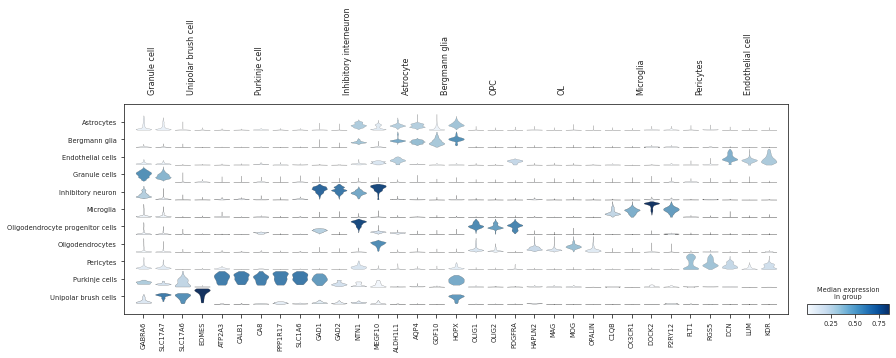

In [18]:
sc.pl.stacked_violin(tdata, markers, groupby='ctype', standard_scale='var', save='_ctype_annotated_markers_imputed.pdf')

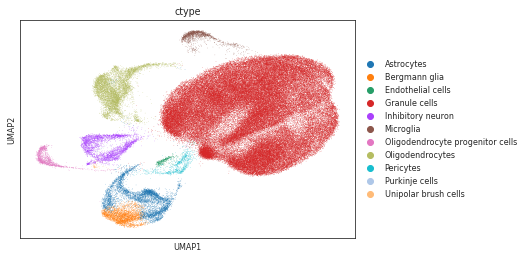

In [20]:
sc.pl.umap(adata, color=['ctype'], save='_ctype_annotation.pdf')

In [21]:
tdata.obs['leiden_subclusters'] = tdata.obs['leiden'].astype(str) + '_' + tdata.obs['subclusters'].astype(str)

... storing 'leiden_subclusters' as categorical
/gpfs/ycga/project/dijk/ngr4/conda_envs/py385dev/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


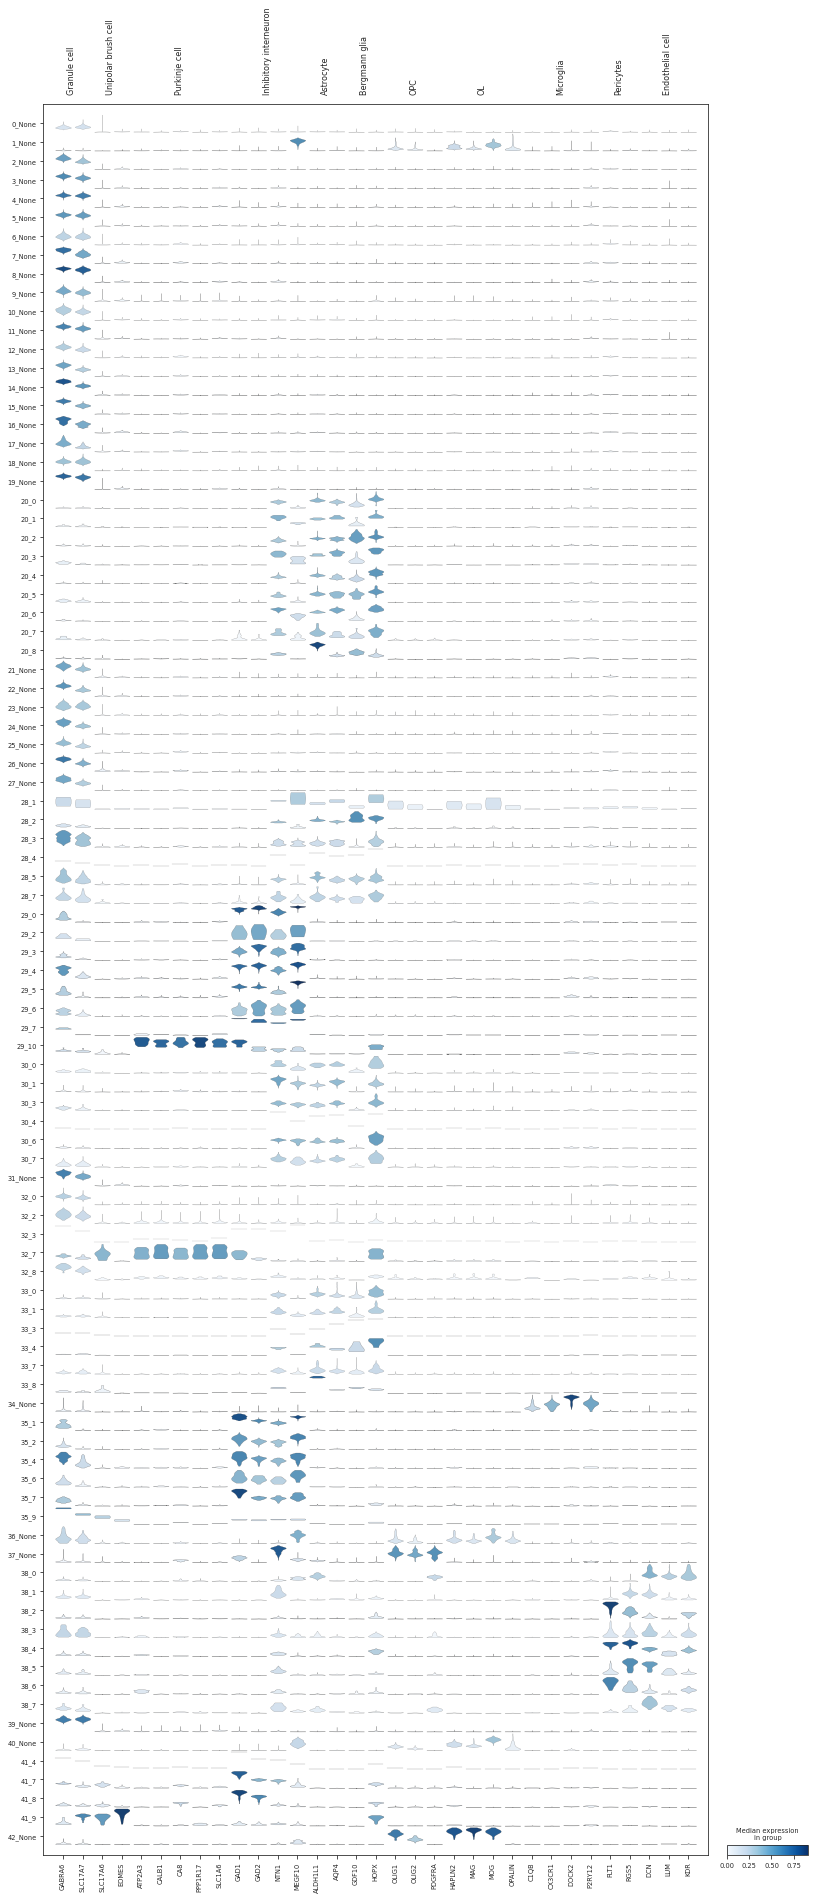

In [22]:
sc.pl.stacked_violin(tdata, markers, groupby='leiden_subclusters', standard_scale='var', save='_clusters_subclusters_imputed.pdf')

/gpfs/ycga/project/dijk/ngr4/conda_envs/py385dev/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/gpfs/ycga/project/dijk/ngr4/conda_envs/py385dev/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


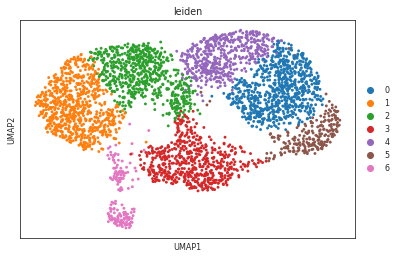

/gpfs/ycga/project/dijk/ngr4/conda_envs/py385dev/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


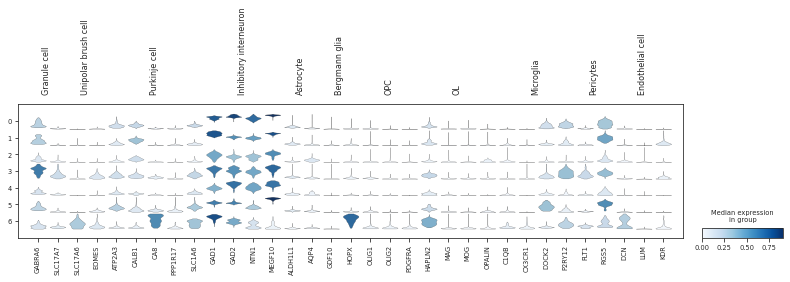

In [33]:
# subluster more

# subcluster 2
cids = ['Inhibitory neuron']
tdata = sc.AnnData(adata[adata.obs['ctype'].isin(cids), :].X, obs=adata[adata.obs['ctype'].isin(cids), :].obs, var=adata.var) 

sc.tl.pca(tdata)
sc.external.pp.bbknn(tdata)
sc.tl.leiden(tdata, resolution=0.5)

ttdata = sc.AnnData(X=X_imputed.loc[X_imputed.index.isin(tdata.obs.index), :])
ttdata.obs.index = X_imputed.loc[X_imputed.index.isin(tdata.obs.index), :].index
ttdata.var_names = X_imputed.columns
ttdata.obs = ttdata.obs.merge(tdata.obs, left_index=True, right_index=True)

sc.tl.umap(tdata)
sc.pl.umap(tdata, color=['leiden'])

if True:
    # visualize on original UMAP
    adata.obs['IN_subcluster'] = 'None'
    adata.obs.loc[adata.obs.index.isin(tdata.obs.index), 'IN_subcluster'] = tdata.obs['leiden'].astype(str)
    sc.pl.umap(adata, color='IN_subcluster')

sc.pl.stacked_violin(ttdata, markers, groupby='leiden', standard_scale='var', dendogram=True)

ttdata.obs.to_csv(os.path.join(pfp, 'subcluster_{}.csv'.format(cids[0].replace(' ', ''))))

del ttdata

In [36]:
adata.obs['IN_subcluster'] = 'None'
adata.obs.loc[adata.obs.index.isin(tdata.obs.index), 'IN_subcluster'] = tdata.obs['leiden'].astype(str)

/gpfs/ycga/project/dijk/ngr4/conda_envs/py385dev/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'IN_subcluster' as categorical


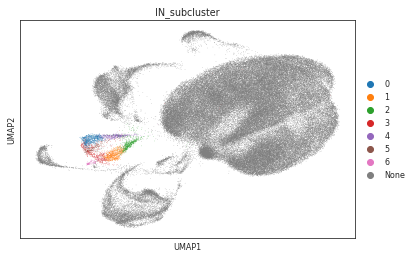

In [37]:
sc.pl.umap(adata, color='IN_subcluster')

In [8]:
adata.obs['ctype'] = adata.obs['ctype'].astype(str)
adata.obs.loc[((adata.obs['IN_subcluster']=='1') |
               (adata.obs['IN_subcluster']=='2') |
               (adata.obs['IN_subcluster']=='6')), 'ctype'] = 'IN1'
adata.obs.loc[((adata.obs['IN_subcluster']=='0') |
               (adata.obs['IN_subcluster']=='3') |
               (adata.obs['IN_subcluster']=='4') |
               (adata.obs['IN_subcluster']=='5')), 'ctype'] = 'IN2'

In [ ]:
marker_genes = [g for k,v in markers.items() for g in v]

X = pd.DataFrame(adata[:, marker_genes].X.todense(), columns=marker_genes, index=adata.obs.index)
G = gt.Graph(data=adata.obsp['connectivities']+sparse.diags([1]*adata.shape[0],format='csr'),
                 precomputed='adjacency',
                 use_pygsp=True)
G.knn_max = None
magic_op = magic.MAGIC().fit(X=X,graph=G) # running fit_transform produces wrong shape
X_imputed = magic_op.transform(X,genes='all_genes')
del X

tdata = sc.AnnData(X=X_imputed)
tdata.obs.index = X_imputed.index
tdata.var_names = X_imputed.columns
tdata.obs = tdata.obs.merge(adata.obs, left_index=True, right_index=True)

In [ ]:
sc.pl.stacked_violin(tdata, markers, groupby='ctype', standard_scale='var', save='_ctype_annotated_markers_imputed.pdf')
sc.pl.umap(adata, color=['ctype'], save='_ctype_annotation.pdf')

In [19]:
if True:
    adata.write(os.path.join(pdfp, 'hum_wsca3.h5ad'))

/gpfs/ycga/project/dijk/ngr4/conda_envs/py385dev/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'Sample' as categorical
... storing 'Condition' as categorical


## check annotation 

In [11]:
ctype_by_batch = pd.DataFrame()
ctype_by_batch['proportion_of_batch'] = adata.obs.groupby(['batch', 'ctype']).count()['n_genes_by_counts'] / adata.obs.groupby('batch').count()['n_genes_by_counts']
ctype_by_batch['n_cells'] = adata.obs.groupby(['batch', 'ctype']).count()['n_genes_by_counts']
ctype_by_batch.to_csv(os.path.join(pfp, 'ctype_by_batch_human_201015.csv'))

/gpfs/ycga/project/dijk/ngr4/conda_envs/py385dev/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


Running MAGIC on 124463 cells and 33 genes.
Using precomputed graph and diffusion operator...
Calculating imputation...


/gpfs/ycga/project/dijk/ngr4/conda_envs/py385dev/lib/python3.8/site-packages/magic/magic.py:589: UserWarning: Running MAGIC.transform on different data to that which was used for MAGIC.fit may not produce sensible output, unless it comes from the same manifold.
  warnings.warn(


Calculated imputation in 0.97 seconds.


/gpfs/ycga/project/dijk/ngr4/conda_envs/py385dev/lib/python3.8/site-packages/magic/utils.py:135: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if isinstance(target_data, pd.SparseDataFrame):
/gpfs/ycga/project/dijk/ngr4/conda_envs/py385dev/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


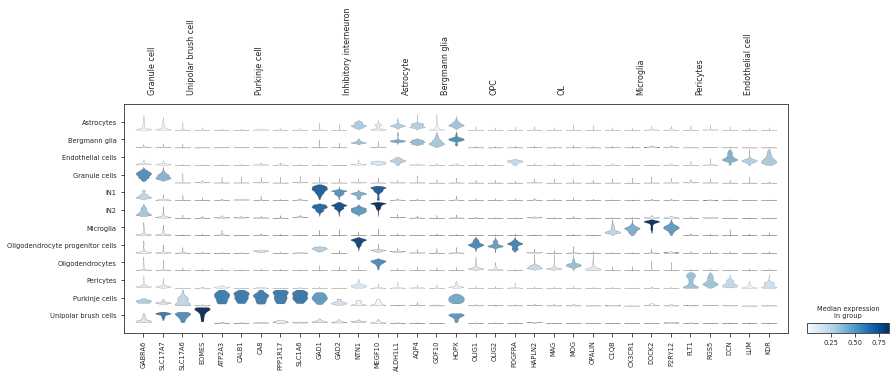

In [12]:
marker_genes = [g for k,v in markers.items() for g in v]

X = pd.DataFrame(adata[:, marker_genes].X.todense(), columns=marker_genes, index=adata.obs.index)
G = gt.Graph(data=adata.obsp['connectivities']+sparse.diags([1]*adata.shape[0],format='csr'),
                 precomputed='adjacency',
                 use_pygsp=True)
G.knn_max = None
magic_op = magic.MAGIC().fit(X=X,graph=G) # running fit_transform produces wrong shape
X_imputed = magic_op.transform(X,genes='all_genes')
del X

tdata = sc.AnnData(X=X_imputed)
tdata.obs.index = X_imputed.index
tdata.var_names = X_imputed.columns
tdata.obs = tdata.obs.merge(adata.obs, left_index=True, right_index=True)

sc.pl.stacked_violin(tdata, markers, groupby='ctype', standard_scale='var', save='_ctype_annotated_markers_imputed.pdf')

In [13]:
pfp

'/home/ngr4/project/scnd/results'